In [61]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

### Protezione civile incidence data

In [62]:
df_ita1 = pd.read_csv("./prot_civ/itaregioni.csv")
# dates = df_ita1.columns[3:]
# df_ita1[dates]

# the previous lines of code spend more time running since the dataframe needs to be accessed twice while iloc reads
# it once 
type(df_ita1.iloc[:,3:])

pandas.core.frame.DataFrame

In [63]:
df = pd.read_csv("./prot_civ/itaregioni.csv")
df = df[['data', 'denominazione_regione', 'nuovi_positivi', 'totale_casi']]
# df.loc[df.denominazione_regione == 'Abruzzo']
region_list = np.unique(df.denominazione_regione.values)
df_list = []
# let's populate the list with dataframes containing a time series of informations about the 20 different regions plus 
# the independent province of Bolzano
for region in region_list:
    df_list.append(df.groupby('denominazione_regione').get_group(region))

In [64]:
a = np.array([True,False,True])
b = np.array([False,False,False])
a | b 
# it's the or elementwise operator 

array([ True, False,  True])

In [65]:
region_list = np.delete(region_list, np.where((region_list == 'P.A. Bolzano') | (region_list == 'P.A. Trento')))
region_list

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Umbria', "Valle d'Aosta", 'Veneto'], dtype=object)

In [66]:
df_trentino = df[(df['denominazione_regione'] == 'P.A. Bolzano') | (df['denominazione_regione'] == 'P.A. Trento')].groupby('data', as_index = False).sum()
region_list = np.hstack((region_list, 'Trentino alto adige'))
region_list

array(['Abruzzo', 'Basilicata', 'Calabria', 'Campania', 'Emilia-Romagna',
       'Friuli Venezia Giulia', 'Lazio', 'Liguria', 'Lombardia', 'Marche',
       'Molise', 'Piemonte', 'Puglia', 'Sardegna', 'Sicilia', 'Toscana',
       'Umbria', "Valle d'Aosta", 'Veneto', 'Trentino alto adige'],
      dtype=object)

In [176]:
df_trentino['denominazione_regione'] = 'Trentino alto adige' 

In [192]:
df_prot_civ = pd.concat([df, df_trentino], ignore_index=True)
df_prot_civ = df_prot_civ[(df_prot_civ['denominazione_regione'] != 'P.A. Bolzano') & (df_prot_civ['denominazione_regione'] != 'P.A. Trento')]

In [67]:
df1 = pd.read_csv('./iss_incid/iss_bydate_abruzzo_positivi.csv')
df1_copy = df1.iloc[3:708].copy()
df1_copy.casi_media7gg

3         0.857143
4         1.000000
5         1.000000
6         1.142857
7         1.428571
          ...     
703    2977.714286
704    2854.000000
705    2740.285714
706    2626.142857
707    2487.857143
Name: casi_media7gg, Length: 705, dtype: float64

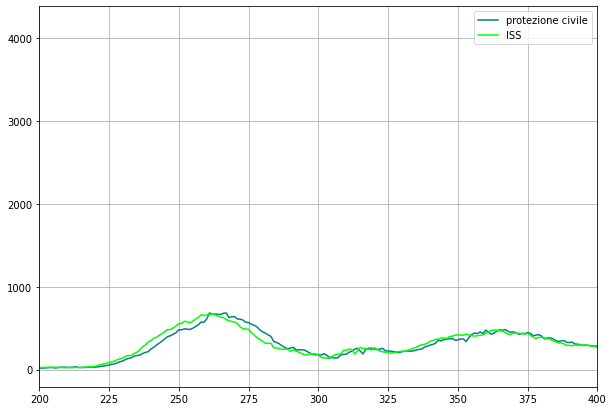

In [68]:
df_copy = df_list[0].copy()
df_copy['rolling_average'] = df_list[0]['nuovi_positivi'].rolling(window = 7, center = True, win_type='gaussian').mean(std = 10000000)
# df_copy[['data', 'rolling_average']]
df_copy.set_index(np.arange(len(df_copy)), inplace=True)
plt.figure(figsize = (10,7))
plt.plot(df_copy.iloc[3:708].rolling_average, color = 'teal', label = 'protezione civile');
plt.plot(df1_copy.casi_media7gg, color = 'lime', label = 'ISS');
plt.xlim([200,400])
plt.legend();
plt.grid();


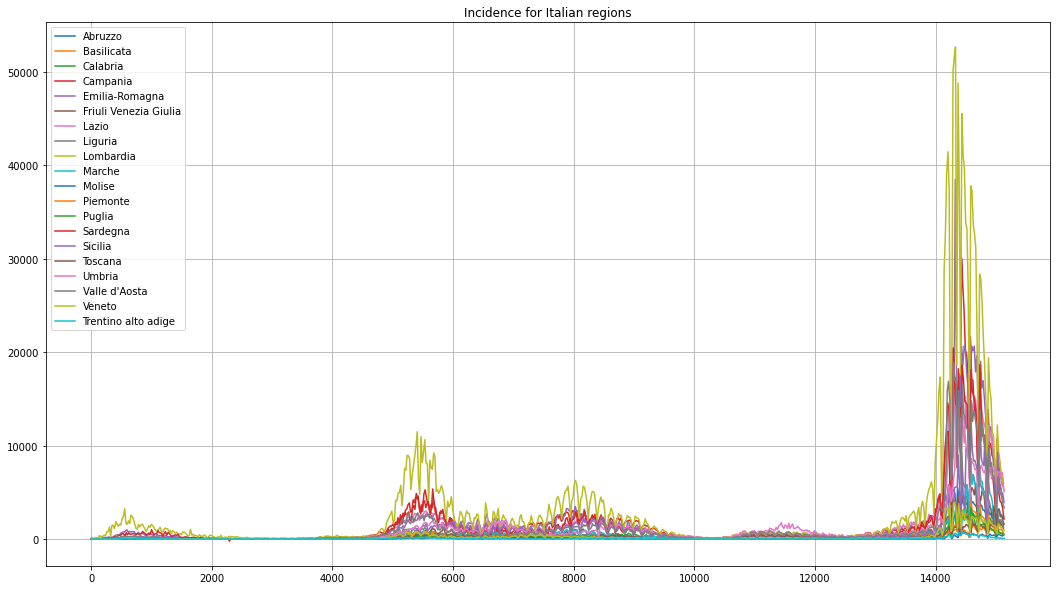

In [69]:
dic_regions = {}
for i,j in enumerate(region_list):
    dic_regions[j] = i
# this dictionary will be useful to extract the desired dataframe of a certain region from the df_list 
plt.figure(figsize=(18,10))
for idx  in region_list:
    plt.plot(df_list[dic_regions[idx]].nuovi_positivi, label = idx)
plt.grid()
plt.title('Incidence for Italian regions')
plt.legend();

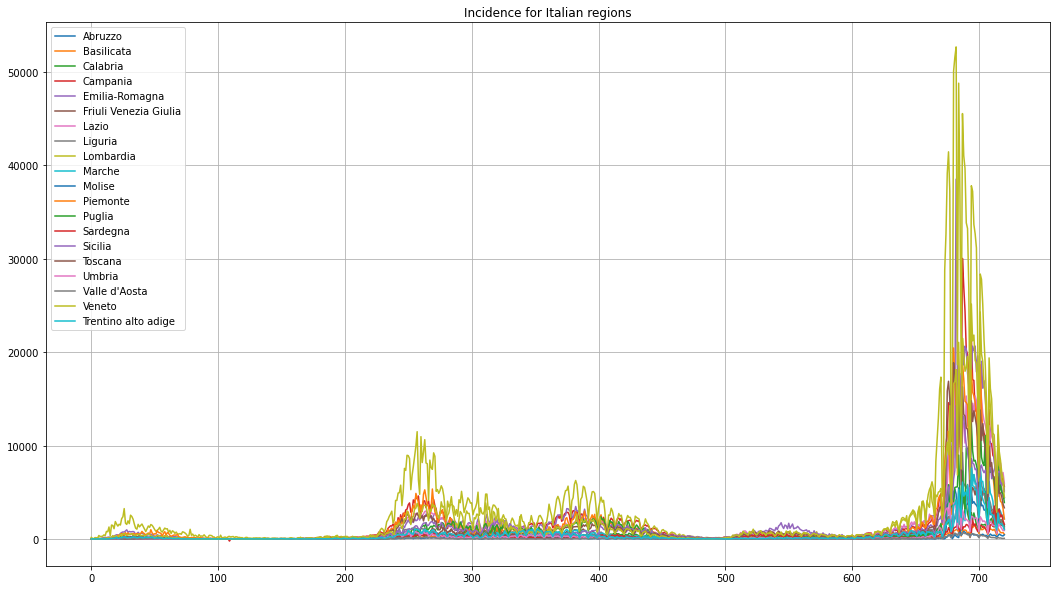

In [217]:
# comprehensive version with a unique dataframe 
plt.figure(figsize=(18,10))

for i in df_prot_civ.denominazione_regione.unique():
    # print(i)
    # print(len(df_prot_civ[df_prot_civ['denominazione_regione'] == i]))
    plt.plot(np.arange(721), df_prot_civ[df_prot_civ['denominazione_regione'] == i].nuovi_positivi, label = i)
plt.grid()
plt.title('Incidence for Italian regions')
plt.legend();

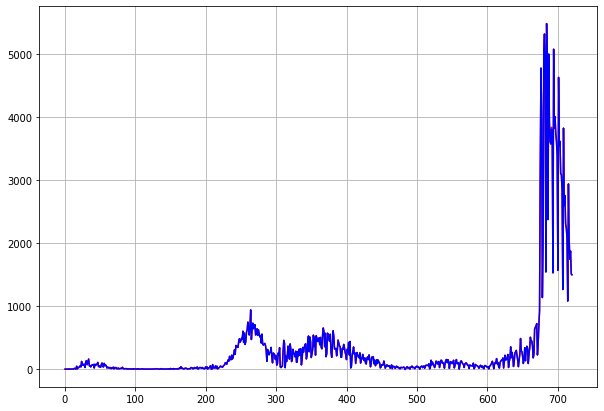

In [70]:
x = np.arange(721)
plt.figure(figsize = (10,7))
plt.plot(x, df_list[0].nuovi_positivi, color = 'red')
# plt.plot(x[1:], np.diff(df_list[0].totale_casi), color = 'blue')
plt.plot(x[1:], [df_list[0].totale_casi.iloc[i+1] - df_list[0].totale_casi.iloc[i] for i in range(720)], color = 'blue')
plt.grid()
plt.show()
# in this way we proved that actually the prevalence is the cumulative distribution of the incidence and they are 
# related as a CDF with a PDF meaning with a derivative 

### ISS incidence data

In [226]:
# path = ["./iss_incid/iss_bydate_" + "%s_" %i + "positivi.csv" for i in region_list]
import re
from os import listdir
from os.path import isfile, join
import itertools

mypath = "iss_incid"
files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
df_list_iss = []

for path in files:
    df_list_iss.append(pd.read_csv("./iss_incid/" + path))

# in order to select the right dataframe corresponding to a certain region we can make a dictionary that assigns 
# to each index 0,1,2... the desired region 
region_list_iss = [] 
for line in files:
    region_list_iss.append(re.findall("^iss_bydate_(.*)_positivi.csv", line))

# in order to flatten the list of lists containing regions that appear in file names of ISS we can use 
# the itertools chain function that unpacks a list of lists and making the result finally a new list 
region_list_iss = list(itertools.chain(*region_list_iss))
# it's necessary to have integer indexes since list can be indexed only with int
# idx_bolzano_iss = int(np.argwhere([i =='pa_bolzano' for i in region_list_iss]))
# idx_trento_iss = int(np.argwhere([i =='pa_trento' for i in region_list_iss]))
# idx_trentinoalto_iss = int(np.argwhere([i =='trentino_alto_adige' for i in region_list_iss]))
# if idx_bolzano_iss < idx_trento_iss:
#     region_list_iss = region_list_iss[idx_bolzano_iss:idx_trento_iss]
# region_list_iss.remove(region_list_iss[idx_trento_iss])

# region_list_iss.remove('pa_bolzano')
# region_list_iss.remove('pa_trento')
# region_list_iss.remove('trentino_alto_adige')

region_list_iss.append('Trentino_alto_adige')
# i could just use the same list of the previous dataset by protezione civile 

dic_regions_iss = {}
for i,j in enumerate(region_list_iss):
    dic_regions_iss[j] = i 

In [231]:
# idx_trentino_iss = np.where((np.array(region_list_iss) == ['pa_bolzano']) | (np.array(region_list_iss) == ['pa_trento']) | (np.array(region_list_iss) == ['trentino_alto_adige']))
idx_trentino_iss = list((np.array(region_list_iss) == ['pa_bolzano']) | (np.array(region_list_iss) == ['pa_trento']) | (np.array(region_list_iss) == ['trentino_alto_adige']))
idx_trentino_iss = list(np.argwhere(idx_trentino_iss).flatten())
df_trentino_iss = [*map(df_list_iss.__getitem__, idx_trentino_iss)]
df_trentino_iss = pd.concat(df_trentino_iss)
df_trentino_iss = df_trentino_iss.groupby('data', as_index=False).sum()
df_list_iss.append(df_trentino_iss)

In [235]:
# assigning a column called region to each dataframe in the df_list_iss list 
for i,frame in enumerate(df_list_iss):
    frame['denominazione_regione'] = region_list_iss[i]
df_list_iss[1]

,data,casi,casi_media7gg,denominazione_regione
0,2020-03-03,1,NaN,basilicata
1,2020-03-04,0,NaN,basilicata
2,2020-03-05,2,NaN,basilicata
3,2020-03-06,2,1.428571,basilicata
4,2020-03-07,0,1.428571,basilicata
...,...,...,...,...
700,2022-02-01,980,660.714286,basilicata
701,2022-02-02,981,NaN,basilicata
702,2022-02-03,750,NaN,basilicata
703,2022-02-04,0,NaN,basilicata


In [238]:
df_iss = pd.concat([*df_list_iss])
df_iss = df_iss[(df_iss['denominazione_regione'] != 'pa_bolzano') & (df_iss['denominazione_regione'] != 'p.a. trento') & (df_iss['denominazione_regione'] != 'trentino_alto_adige')]

In [ ]:
plt.figure(figsize=(18,10))
for idx  in region_list_iss:
    plt.plot(df_list_iss[dic_regions_iss[idx]].casi, label = idx)
plt.grid()
plt.title('Incidence for Italian regions')
plt.legend();

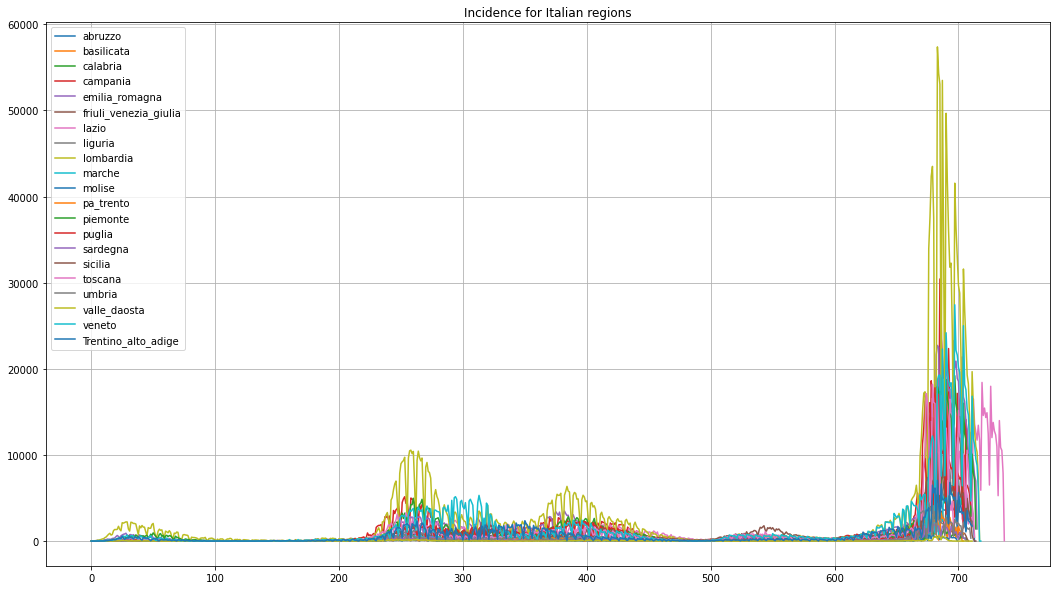

In [239]:
# comprehensive version with a unique dataframe 
plt.figure(figsize=(18,10))

for i in df_iss.denominazione_regione.unique():
    # print(i)
    # print(len(df_prot_civ[df_prot_civ['denominazione_regione'] == i]))
    plt.plot(df_iss[df_iss['denominazione_regione'] == i].casi, label = i)
plt.grid()
plt.title('Incidence for Italian regions')
plt.legend();

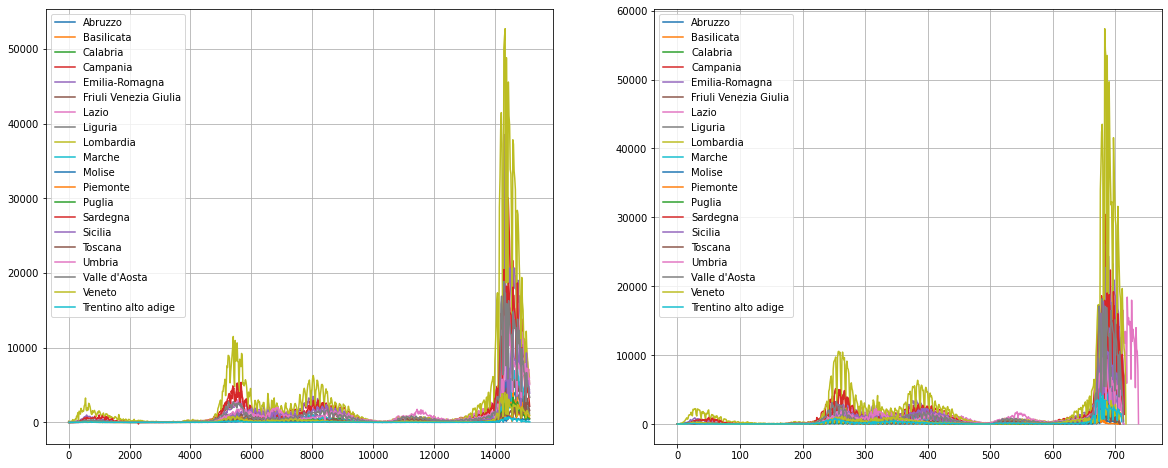

In [413]:
# comparing the two plots for the different dataframes 

fig, ax = plt.subplots(1,2, figsize=(20,8))
for idx  in region_list:
    ax[0].plot(df_list[dic_regions[idx]].nuovi_positivi, label = idx)
for idx  in region_list_iss:
    ax[1].plot(df_list_iss[dic_regions_iss[idx]].casi, label = idx)
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()


From now on we will use data coming from protezione civile since dates of measurements are common for all regions while in ISS dataframes lengths were different. 

### Json for different regions colors 

In [102]:
grouped = pd.read_csv('dataset.csv').groupby('colore')

for name, group in grouped:
    display(name, group)

'arancione'

,data,denominazione_regione,colore
4,2020-11-10,Abruzzo,arancione
5,2020-11-11,Abruzzo,arancione
6,2020-11-12,Abruzzo,arancione
7,2020-11-13,Abruzzo,arancione
8,2020-11-14,Abruzzo,arancione
...,...,...,...
9526,2021-04-21,Veneto,arancione
9527,2021-04-22,Veneto,arancione
9528,2021-04-23,Veneto,arancione
9529,2021-04-24,Veneto,arancione


'bianco'

,data,denominazione_regione,colore
213,2021-06-07,Abruzzo,bianco
214,2021-06-08,Abruzzo,bianco
215,2021-06-09,Abruzzo,bianco
216,2021-06-10,Abruzzo,bianco
217,2021-06-11,Abruzzo,bianco
...,...,...,...
9764,2021-12-15,Veneto,bianco
9765,2021-12-16,Veneto,bianco
9766,2021-12-17,Veneto,bianco
9767,2021-12-18,Veneto,bianco


'giallo'

,data,denominazione_regione,colore
0,2020-11-06,Abruzzo,giallo
1,2020-11-07,Abruzzo,giallo
2,2020-11-08,Abruzzo,giallo
3,2020-11-09,Abruzzo,giallo
62,2021-01-07,Abruzzo,giallo
...,...,...,...
9823,2022-02-12,Veneto,giallo
9824,2022-02-13,Veneto,giallo
9825,2022-02-14,Veneto,giallo
9826,2022-02-15,Veneto,giallo


'rosso'

,data,denominazione_regione,colore
16,2020-11-22,Abruzzo,rosso
17,2020-11-23,Abruzzo,rosso
18,2020-11-24,Abruzzo,rosso
19,2020-11-25,Abruzzo,rosso
20,2020-11-26,Abruzzo,rosso
...,...,...,...
9507,2021-04-02,Veneto,rosso
9508,2021-04-03,Veneto,rosso
9509,2021-04-04,Veneto,rosso
9510,2021-04-05,Veneto,rosso
